# Algoritmo QR
Es una técnica de reducción de matriz utilizada para determinar los valores propios o eigenvalores de una matriz simétrica.
Para aplicar el algoritmo es necesario tener una matriz simétrica diagonal. Es decir, una matriz con elementos con valor distinto de 0 ubicados unicamente en la diagonal principal o en las subdiagonales adyacentes.

Si la matriz de la que se dispone no se trata de una matriz simétrica diagonal, debe aplicarse el método de Householder para encontrar una matriz con las características deseadas.

Sea 'a' un arreglo que contiene los valores de la diagonal central.
Sea 'b' un arreglo que contiene los valores de las subdiagonales.

\begin{equation}
a =
\begin{bmatrix}
a_1 & a_2 & a_3 & ... & a_n
\end{bmatrix}
\end{equation}

\begin{equation}
b =
\begin{bmatrix}
b_2 & b_3 & ... & b_n
\end{bmatrix}
\end{equation}

Se puede denotar una matriz simétrica tridiagonal de la siguiente manera:

\begin{equation}
\begin{bmatrix}
a_1 & b_2 & 0 & 0\\
b_2 & a_2 & b_3 & 0\\
0 & b_3 & a_3 & b_n\\
0 & 0 & b_n & a_n
\end{bmatrix}
\end{equation}

Si un elemento $b_n$ tiene un valor de 0, entonces la matriz 1x1 $[a_n]$ inmediatamente produce un eigenvalor $a_n$.

Cuando un elemento $b_j$ = 0 para algunas j, donde: \begin{equation} 2 < j < n \end{equation}

El algoritmo reduce el problema particionando la matriz A en dos matrices:

\begin{equation}
\begin{bmatrix}
a_1 & b_2 & 0 & 0\\
b_2 & a_2 & b_3 & 0\\
0 & b_3 & a_3 & b_{j-1}\\
0 & 0 & b_{j-1} & a_{j-1}
\end{bmatrix}
\end{equation}
\begin{equation}
\begin{bmatrix}
a_j & b_{j+1} & 0 & 0\\
b_{j+1} & a_{j+1} & b_{j+2} & 0\\
0 & b_{j+2} & a_{j+2} & b_n\\
0 & 0 & b_n & a_n
\end{bmatrix}
\end{equation}




Luego se forma una sucesión de matrices: 

\begin{equation}
A= A^1, A^2, A^3, ...
\end{equation}

Donde un elemento $A^i$ se factoriza como un producto $\begin{equation} A^i = Q^i R^i \end{equation}$, donde $Q^i$ es una matriz ortogonal y $R^i$ es una matriz triangular superior.
Asi mismo, un elemento $A^{i+1}$ se define como el producto de $R^i$ y $Q^i$ en dirección inversa $\begin{equation} A^i = R^i Q^i\end{equation}$. Debido a que el elemento $Q^i$ es ortogonal, es posible expresar $R^i$ como $\begin{equation} R^i = Q^{i^t} A^i \end{equation}$, por lo tanto:
\begin{equation} 
A^{i+1} = R^i Q^i = (Q^{i^t} A^i) Q^i = Q^{i^t} A^i Q^i 
\end{equation}

De esta manera, se garantiza que $A^{i+1}$ es simétrica con los mismos valores propios que $A^i$ y que se trata de una matriz tridiagonal.

## Factorización QR

Para implementar la factorización de una matriz A expresándola como el producto de Q y R, es posible utilizar distintos subalgoritmos que permitan realizar esta operación como el proceso de ortogonalización de Gram-Schmidt, apoyandonos en la reflexión de Householder o utilizando las rotaciones de Givens, este último será el algoritmo a implementar en código.   

Utilizando matrices denotadas por $P_n$, las cuales representan un tipo de transformación lineal llamado rotación, es posible expresar la factorización de $A^1 = Q^1 R^1$ usando un producto de n - 1 matrices de rotación para construir la matriz:
\begin{equation}
R^1 = P_n P_{n-1} ... P_2 A^1.
\end{equation}
La matriz $P_k$ se selecciona de manera que $A_k^1 = P_k A_{k-1}^1$ en la posición $[k, k - 1]$ sea igual a cero. Todas las matrices de rotación son ortogonales, por lo que $P P^t = I$.

Luego, para la factorización de $Q$ se utiliza la transpuesta de cada matriz de rotación $P$, de tal forma que:
\begin{equation} 
Q = P_2{^t} P_3{^t} ... P_n{^t}.
\end{equation}

Utilizando la ortogonalidad de las matrices de rotación:

\begin{equation} 
A^1 = (P_2{^t} P_3{^t} ... P_n{^t}) \cdot (P_n P_{n-1} ... P_2 A^1$) =  Q^1 \cdot R^1
\end{equation}

La matriz $Q^1$ se trata de una matriz Hessenberg superior. Así mismo $A^2 = R^1 \cdot Q^1$ también es una matriz Hessenberg superior porque al multiplicar $Q^1$ a la izquierda de la matriz $R^1$, la cual se trata de una matriz triangular superior, no se afectan las entradas en el triangulo inferior de la misma. Por lo tanto, A^2 se trata igualmente de una matriz tridiagonal.

Las entradas fuera de la diagonal de $A^{k+1}$ serán de una menor magnitud que las entradas correspondientes en la matriz $A^k$, entonces es posible deducir que $A^{k+1}$ está más cerca de ser una matriz diagonal, que contenga los eigenvalores buscados, respecto a $A^k$. Este proceso se repite hasta obtener una convergencia satisfactoria.



## Implementación en Python

In [3]:
from math import sqrt
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap

In [12]:
%matplotlib inline
mapa = ListedColormap(['#C2FFF5','#00adb5', '#0c056d','#f25d9c', '#8FFF5C','#ff5722'])

def matriz(a,b):
    matrix = []
    for i in range(1, len(a)):
        row = []
        for j in range(1, len(a)):
            if(i == j):
                row.append(a[i])
            elif(abs(j - i) == 1):
                row.append(b[max(i, j)])
            else:
                row.append(0)
        matrix.append(row)
    return matrix

def imprimirMatriz(matrix, index):
    plt.imshow(matrix, cmap=mapa)
    plt.axis('off')
    plt.colorbar()
    print("\nIteración " + str(index) + ": ")
    plt.show()

In [10]:
'''
n: Tamaño de la matriz
a: Arreglo que contiene los elementos de la diagonal principal
b: arreglo que contiene los elementos de las subdiagonales
TOL: Máxima diferencia permitida respecto a cero
m: Cantidad máxima de iteraciones
'''

def QR(n, a, b, TOL, m):
    c = []
    d = []
    q = []
    r = []
    x = []
    y = []
    z = []
    sigma = []

    #Se inicializan las listas con n elementos con valor de 0
    for j in range (0, n + 1):
        c.append(0)
        d.append(0)
        q.append(0)
        r.append(0)
        x.append(0)
        y.append(0)
        z.append(0)
        sigma.append(0)
    
    # Primera iteración
    k = 1     
    shift = 0
    eigenvalue = 0
    eigenvalues = []

    #Se agregan valores de 0 a las listas para facilitar la lectura del algoritmo
    a.insert(0,0)
    b.insert(0,0)
    b.insert(0,0)
    imprimirMatriz(matriz(a,b), k)
    while k < m:
        if(k % 10 == 0):
            imprimirMatriz(matriz(a,b), k)
        # Se verifica si los extremos de la diagonal contienen eigenvalores
        if abs(b[n]) <= TOL:
            eigenvalue = a[n] + shift
            eigenvalues.append(eigenvalue)
            n = n - 1
        
        if abs(b[2]) <= TOL:
            eigenvalue = a[1] + shift
            eigenvalues.append(eigenvalue)
            n = n - 1
            a[1] = a[2]
            # Se desplazan los valores en las diagonales  
            for j in range(2, n + 1):
                a[j] = a[j + 1]
                b[j] = b[j + 1]
        
        if n == 0 :
            imprimirMatriz(matriz(a,b), k)
            return eigenvalues
        
        if n == 1 :
            eigenvalue = a[1] + shift
            eigenvalues.append(eigenvalue)
            imprimirMatriz(matriz(a,b), k)
            return eigenvalues
        
        b[0] = - (a[n - 1] + a[n])
        c[0] = a[n] * a[n - 1] - (b[n]) ** 2
        d[0] = sqrt(((b[0] ** 2) - 4 * c[0]))

        if(b[0] > 0):
            mu1 = -2 * c[0] / (b[0] + d[0])
            mu2 = - (b[0] + d[0]) / 2
        else:
            mu1 = (d[0] - b[0]) / 2
            mu2 = (2 * c[0]) / (d[0] - b[0])

        if(n == 2):
            eigenvalue = mu1 + shift
            eigenvalue = mu2 + shift

        if abs(mu1 - a[n]) < abs(mu2 - a[n]):
            sigma[0] = mu1-a[n]
        else:
            sigma[0] = mu2-a[n]

        shift = shift + sigma[0]

        for j in range(1, n + 1):
            d[j] = a[j] - sigma[0]

        #Calculando R^k
        x[1] = d[1]
        y[1] = b[2]
        c[1] = c[0]
        sigma[1] = sigma[0]
        for j in range (2, n + 1):
            z[j - 1] = sqrt((x[j - 1] ** 2) + (b[j] ** 2))
            c[j] = x[j - 1] / z[j - 1]
            sigma[j] =  b[j] / z[j - 1]

            q[j - 1] = c[j] * y[j - 1]  + sigma[j] * d[j]
            x[j] = - sigma[j] * y[j - 1] + c[j] * d[j]
            
            if(j != n):
                r[j - 1] = sigma[j] * b[j + 1]
                y[j] = c[j] * b[j + 1]
        
        #Calculando A^(k + 1)
        z[n] = x[n]
        a[1] = sigma[2] * q[1] + c[2] * z[1]
        b[2] = sigma[2] * z[2]

        for j in range(2, n):
            a[j] = (sigma[j + 1] * q[j]) + (c[j] * c[j + 1] * z[j])
            b[j + 1] = sigma[j + 1] * z[j + 1]

        a[n] = c[n] * z[n]

        k = k + 1

    print('Se ha superado el numero máximo de iteraciones')
    return eigenvalues


## Experimentos numéricos

### Experimento 1
Utilizando el algoritmo QR con precisión de $10^{-5}$, demuestre que los eigenvalores de la matriz dada son: $\lambda_{1} = −0.06870782$, $\lambda_{2} = 2.722246$ y $\lambda_{3} = 5.346462$.

\begin{equation}
A =
\begin{bmatrix}
3 & 1 & 0\\
1 & 4 & 2\\
0 & 2 & 1
\end{bmatrix}
\end{equation}




Iteración 1: 


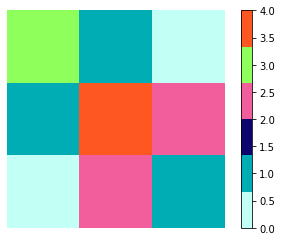


Iteración 10: 


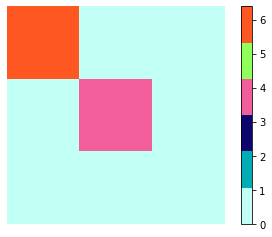


Iteración 20: 


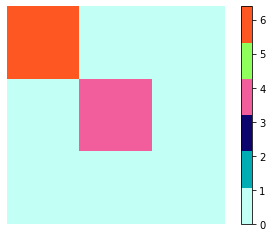


Iteración 27: 


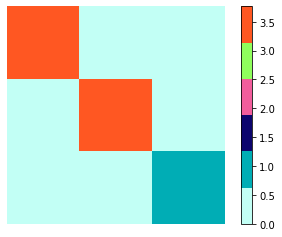


Eigenvalores de la matriz: -0.06870782332199432, 2.7222456337737406, 5.346462189548253


In [20]:
eigenvals = QR(3, [3, 4, 1], [1, 2], 10**-5, 1000)
print('\nEigenvalores de la matriz: ' + ', '.join(map(str, eigenvals)))

### Experimento 2

Los eigenvalores correspondientes a la matriz B son los siguientes: $\lambda_{1} = 0.1922421$, $\lambda_{2} = 0.5238224$, $\lambda_{3} = 1.189091$ y $\lambda_{4} = 0.9948440$. Compruebe esta afirmación utilizando el algoritmo QR con precisión de $10^{-5}$.

\begin{equation}
B =
\begin{bmatrix}
0.5 & 0.25 & 0 & 0\\
0.25 & 0.8 & 0.4 & 0\\
0 & 0.4 & 0.6 & 0.1\\
0 & 0 & 0.1 & 1
\end{bmatrix}
\end{equation}


Iteración 1: 


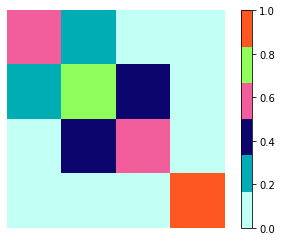


Iteración 10: 


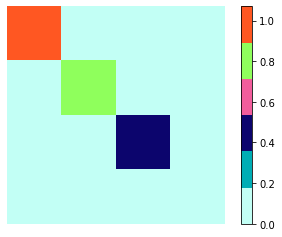


Iteración 20: 


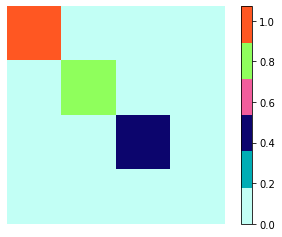


Iteración 30: 


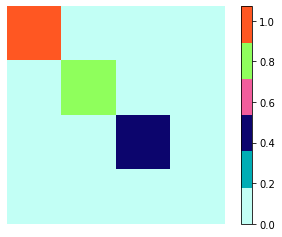


Iteración 40: 


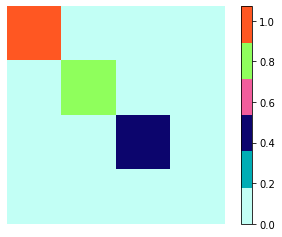


Iteración 48: 


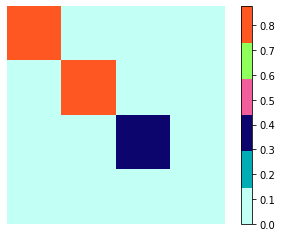


Eigenvalores de la matriz: 0.19224214160156028, 0.5238224091238559, 0.9948440427556363, 1.1890914065189455


In [21]:
eigenvals = QR(4, [0.5, 0.8, 0.6, 1], [0.25, 0.4, 0.1], 10**-5, 1000)
print('\nEigenvalores de la matriz: ' + ', '.join(map(str, eigenvals)))

### Experimento 3

Demuestre que los eigenvalores de la matriz dada son los siguientes: $\lambda_{1} = 0.890$, $\lambda_{2} = 2.071$, $\lambda_{3} = 3.728$, $\lambda_{4} = 4.027$ y $\lambda_{5} = 5.784$. Utilice el algoritmo QR con precisión de $10^{-6}$.

\begin{equation}
C =
\begin{bmatrix}
5 & -1 & 0 & 0 & 0\\
-1 & 4.5 & 0.2 & 0 & 0\\
0 & 0.2 & 1 & -0.4 & 0\\
0 & 0 & -0.4 & 3& 1\\
0 & 0 & 0 & 1 & 3
\end{bmatrix}
\end{equation}


Iteración 1: 


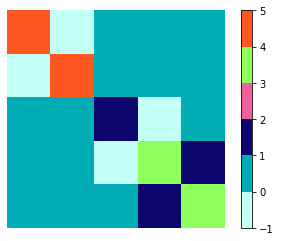


Iteración 10: 


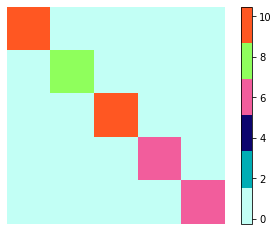


Iteración 20: 


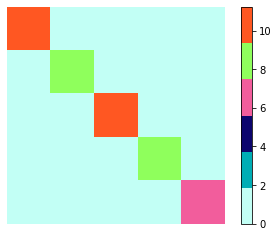


Iteración 30: 


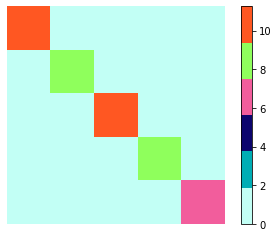


Iteración 40: 


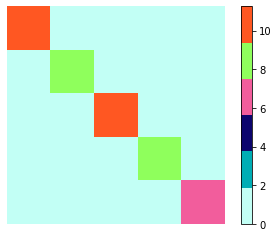


Iteración 50: 


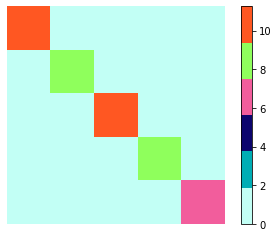


Iteración 60: 


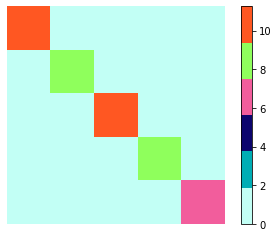


Iteración 70: 


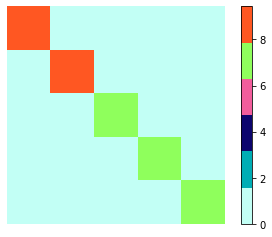


Iteración 80: 


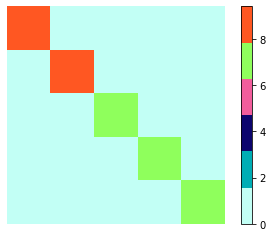


Iteración 90: 


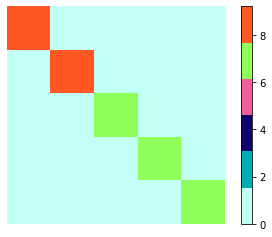


Iteración 100: 


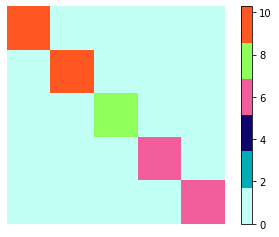


Iteración 110: 


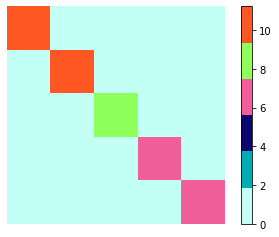


Iteración 120: 


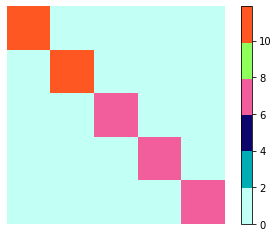


Iteración 130: 


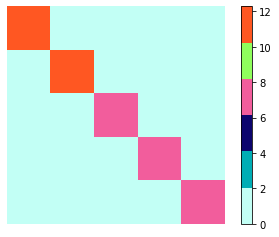


Iteración 140: 


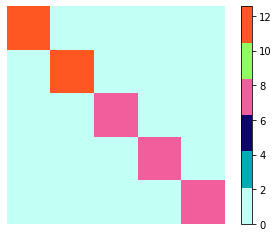


Iteración 150: 


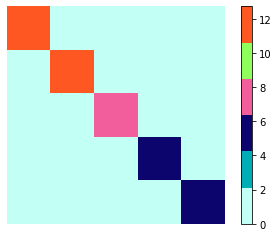


Iteración 160: 


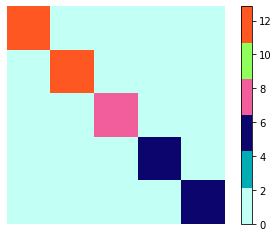


Iteración 170: 


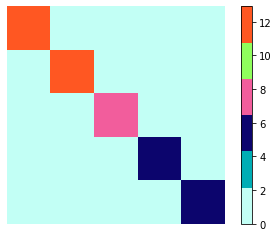


Iteración 180: 


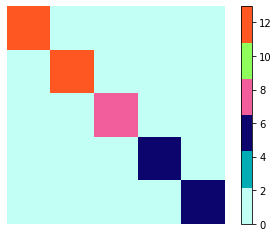


Iteración 190: 


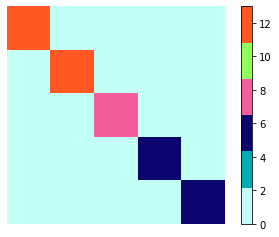


Iteración 200: 


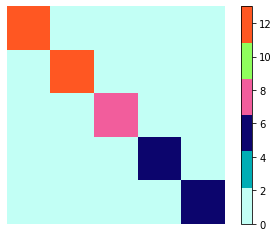


Iteración 210: 


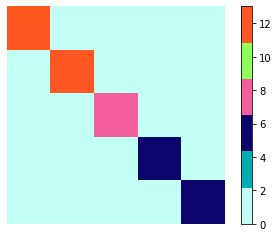


Iteración 220: 


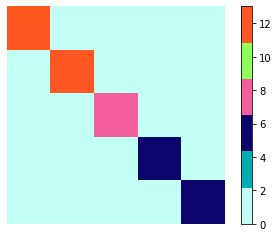


Iteración 230: 


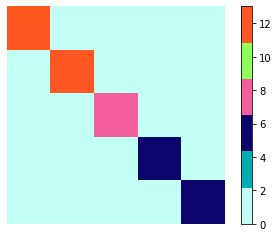


Iteración 240: 


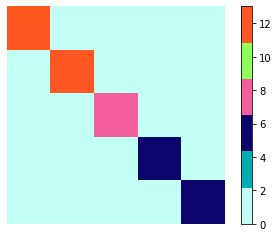


Iteración 250: 


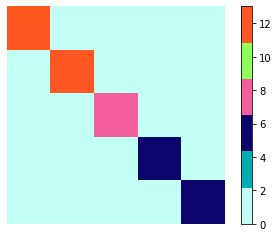


Iteración 260: 


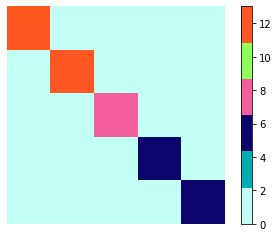


Iteración 270: 


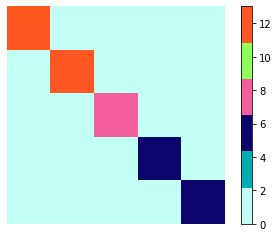


Iteración 280: 


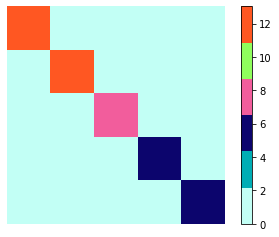


Iteración 290: 


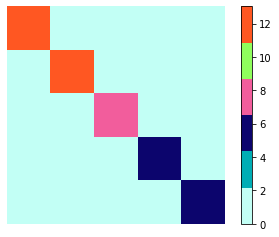


Iteración 300: 


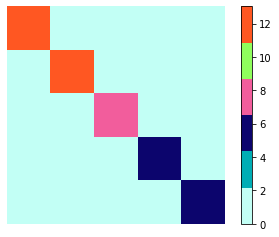


Iteración 310: 


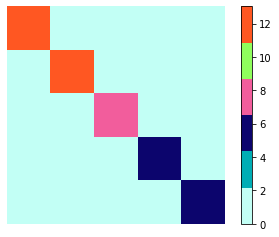


Iteración 320: 


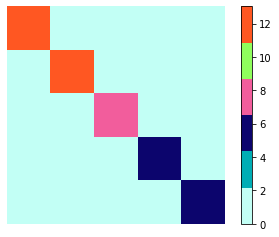


Iteración 330: 


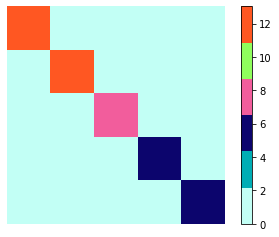


Iteración 340: 


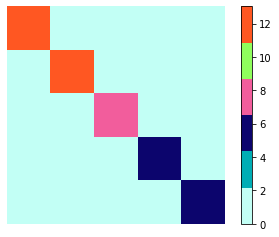


Iteración 350: 


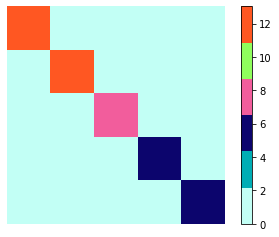


Iteración 360: 


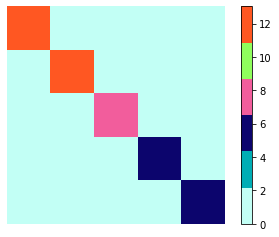


Iteración 370: 


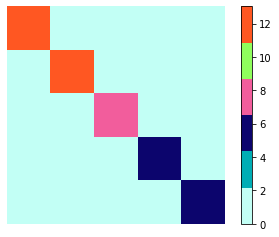


Iteración 380: 


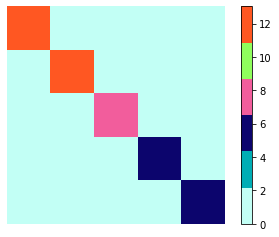


Iteración 390: 


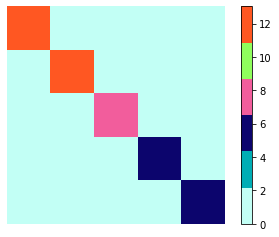


Iteración 400: 


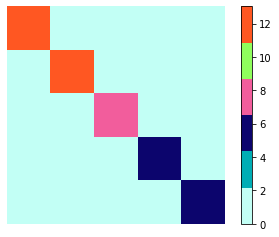


Iteración 410: 


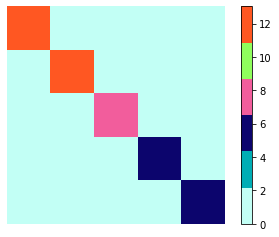


Iteración 420: 


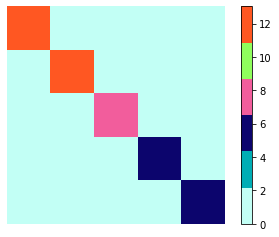


Iteración 430: 


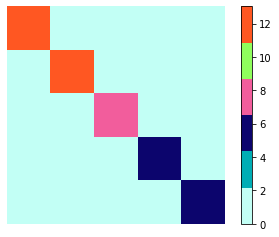


Iteración 440: 


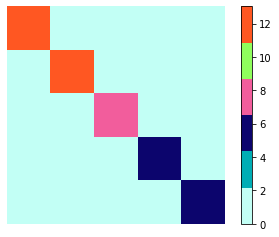


Iteración 450: 


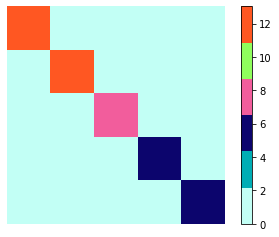


Iteración 460: 


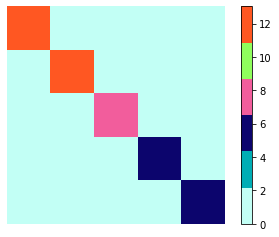


Iteración 470: 


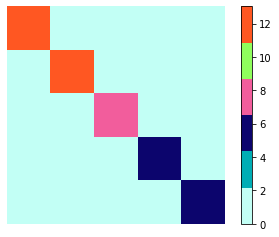


Iteración 480: 


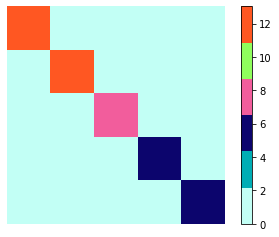


Iteración 490: 


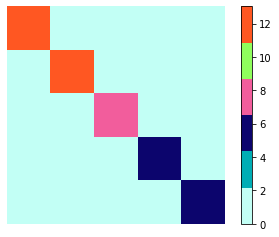


Iteración 500: 


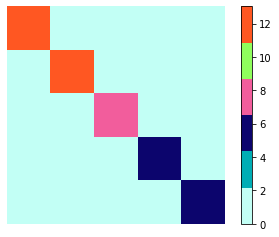


Iteración 510: 


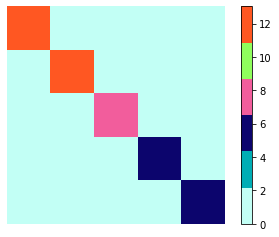


Iteración 520: 


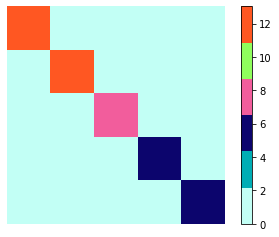


Iteración 530: 


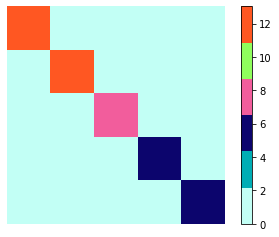


Iteración 540: 


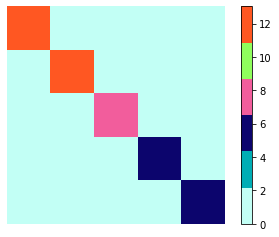


Iteración 550: 


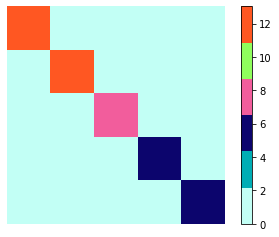


Iteración 560: 


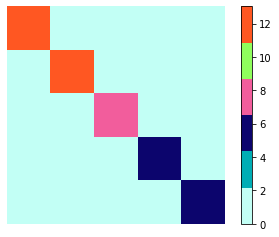


Iteración 570: 


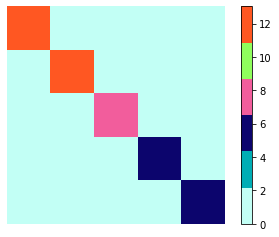


Iteración 580: 


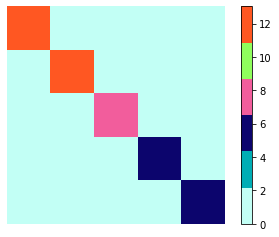


Iteración 590: 


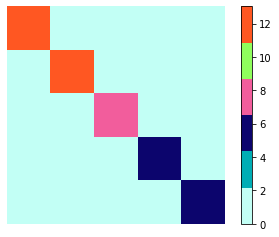


Iteración 600: 


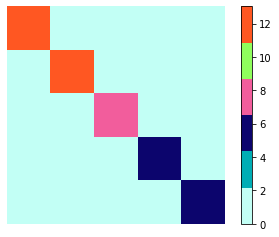


Iteración 610: 


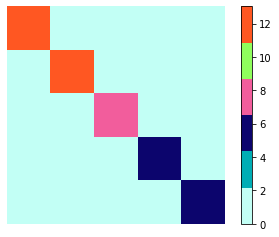


Iteración 620: 


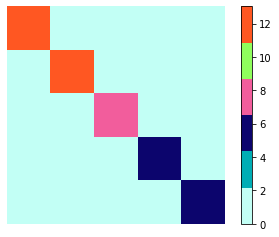


Iteración 625: 


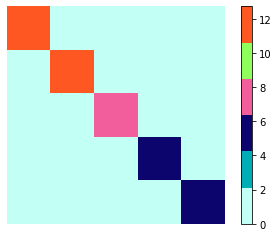


Eigenvalores de la matriz: 5.783995566511156, 0.8903002467172767, 2.070712804092203, 3.7275564244314605, 4.027434958247889


In [24]:
eigenvals = QR(5, [5, 4.5, 1, 3, 3], [-1, 0.2, -0.4, 1], 10**-6, 1000)
print('\nEigenvalores de la matriz: ' + ', '.join(map(str, eigenvals)))

## Referencias relevantes

- Budai, A. (2018, Enero 2). QR algorithm: finding eigenvalues. Obtenido de Adam Budai's Blog: <https://adamtiger.github.io/ai/math/2018/01/02/qr.html>

- Burden, R. L., Faires, J. D., & Burden, A. M. (2010). The QR Algorithm. En Numerical Analysis (Novena ed., págs. 601-611). Cengage Learning.

- Burden, R. L., Faires, J. D., & Burden, A. M. (2016). El algoritmo QR. En Análisis numérico (Décima ed., págs. 452-462). Cengage Learning.

- Jarlebring, E. (2014). Lecture notes in numerical linear algebra. Estocolmo, Suecia: Obtenido de: <https://www.math.kth.se/na/SF2524/matber15/qrmethod.pdf>

- Kong, Q., Siauw, T., & Bayen, A. (2020). Python programming and numerical methods. Academic Press.

- Parlett, B. N. (2000). The QR algorithm. Computing in Science & Engineering, 2(1), 38-42.